In [2]:
# Extract foregrounds
# Select backgrounds
# Compose each foreground with each background
# or with randomly sampled N backgrounds

In [2]:
#%load_ext autoreload
#%autoreload 2
import jpeg4py as jpeg
from matplotlib import pyplot as plt
import json
from pathlib import Path
import random
from PIL import Image
import numpy as np
import torch
import cv2
import pandas as pd



In [3]:
coco_dir = Path("../../../../Новый том1/2021/alpha-matting-datasets/coco")

with open(coco_dir / "annotations" / "instances_val2017.json") as f:
    coco_instances = json.load(f)

print(coco_dir)

../../../../Новый том1/2021/alpha-matting-datasets/coco


In [8]:
random_images = random.sample(coco_instances["images"], 10)

In [9]:
random_images

[{'license': 4,
  'file_name': '000000446207.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000446207.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-24 08:48:40',
  'flickr_url': 'http://farm4.staticflickr.com/3121/3160251864_87bc5a4273_z.jpg',
  'id': 446207},
 {'license': 3,
  'file_name': '000000560178.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000560178.jpg',
  'height': 480,
  'width': 640,
  'date_captured': '2013-11-20 02:51:26',
  'flickr_url': 'http://farm1.staticflickr.com/74/193722870_4c62e8fd00_z.jpg',
  'id': 560178},
 {'license': 5,
  'file_name': '000000038070.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000038070.jpg',
  'height': 375,
  'width': 500,
  'date_captured': '2013-11-15 15:48:55',
  'flickr_url': 'http://farm3.staticflickr.com/2068/2431080078_5c0ff7d4e8_z.jpg',
  'id': 38070},
 {'license': 1,
  'file_name': '000000368038.jpg',
  'coco_url': 'http://images.cocodataset.org/val2017/000000368

In [20]:
coco_img_dir = coco_dir / "images" / "train2017"
img_list = list(map(str, coco_img_dir.rglob("*.jpg")))
background_list = []

fig = plt.figure()
closed = False

def handle_close(evt):
    global closed
    closed = True

def waitforbuttonpress(time):
    to_add = plt.waitforbuttonpress(time)
    if to_add is None:
        if closed:
            return "kek"
    return to_add

time = 20
fig.canvas.mpl_connect('close_event', handle_close)
for i, img_name in enumerate(img_list[last_i:]):
    img = jpeg.JPEG(img_name).decode()
    plt.title(img_name.split('/')[-1])
    plt.imshow(img)
    plt.draw()
    to_add = waitforbuttonpress(time)
    if to_add == "kek":
        break
    if not to_add:
        background_list.append(img_name.split('/')[-1])

In [ ]:
places_background_list = []

In [7]:
%matplotlib qt
import matplotlib.pyplot as plt

places_dir = coco_dir.parents[0] / "places365" / "val_large"
places_img_list = list(map(str, places_dir.rglob("*.jpg")))


fig = plt.figure()
closed = False

def handle_close(evt):
    global closed
    closed = True

def waitforbuttonpress(time):
    to_add = plt.waitforbuttonpress(time)
    if to_add is None:
        if closed:
            return "kek"
    return to_add

time = 20
last_i = 0
fig.canvas.mpl_connect('close_event', handle_close)
for places_i, img_name in enumerate(places_img_list[places_last_i:]):
    print('kek')
    img = jpeg.JPEG(img_name).decode()
    plt.title(img_name.split('/')[-1])
    plt.imshow(img)
    plt.draw()
    to_add = waitforbuttonpress(time)
    if to_add == "kek":
        break
    if not to_add:
        places_background_list.append(img_name.split('/')[-1])


kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek
kek


In [8]:
places_background_list

['Places365_val_00000005.jpg',
 'Places365_val_00000006.jpg',
 'Places365_val_00000008.jpg',
 'Places365_val_00000009.jpg',
 'Places365_val_00000010.jpg',
 'Places365_val_00000012.jpg',
 'Places365_val_00000013.jpg',
 'Places365_val_00000014.jpg',
 'Places365_val_00000016.jpg',
 'Places365_val_00000017.jpg',
 'Places365_val_00000020.jpg',
 'Places365_val_00000022.jpg',
 'Places365_val_00000024.jpg',
 'Places365_val_00000025.jpg',
 'Places365_val_00000029.jpg',
 'Places365_val_00020504.jpg',
 'Places365_val_00020505.jpg',
 'Places365_val_00020506.jpg',
 'Places365_val_00020510.jpg',
 'Places365_val_00020511.jpg',
 'Places365_val_00020512.jpg',
 'Places365_val_00020514.jpg',
 'Places365_val_00020515.jpg',
 'Places365_val_00020516.jpg',
 'Places365_val_00020519.jpg',
 'Places365_val_00020521.jpg',
 'Places365_val_00020524.jpg',
 'Places365_val_00020525.jpg',
 'Places365_val_00020527.jpg',
 'Places365_val_00020528.jpg',
 'Places365_val_00010542.jpg',
 'Places365_val_00010543.jpg',
 'Places

In [9]:
places_last_i = places_i
print(f"places last i: {places_last_i}")

places last i: 194


In [10]:
len(places_background_list)

224

In [11]:
import pandas as pd

df = pd.DataFrame(columns=['name'], data=places_background_list)
df.to_csv(places_dir.parents[0] / "background_names.csv", index=False)

In [13]:
places_dir = coco_dir.parents[0] / "places365" / "val_large"

aisegment_dir = Path("../other_datasets/AISegment.com/matting_human_half/")
aisegment_img_df = pd.read_csv("../data/AISegment/train_images.csv")
aisegment_matte_df = pd.read_csv("../data/AISegment/train_mattes.csv")

backgrounds_df = pd.read_csv(places_dir.parents[0] / "background_names.csv")
places_background_list = backgrounds_df.name.tolist()

In [14]:
len(aisegment_img_df)

27540

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.nn import functional as F
import tqdm

aisegment_paths = aisegment_img_df.path.tolist()
aisegment_matte_paths = aisegment_matte_df.path.tolist()

for i, aisegment_path in enumerate(tqdm.tqdm(aisegment_paths)):
    aisegment_img_example = jpeg.JPEG(aisegment_path).decode()
    aisegment_matte_example = np.array(Image.open(aisegment_matte_paths[i]))[:, :, 3]
    aisegment_img_example = aisegment_img_example / 255.
    aisegment_matte_example = aisegment_matte_example / 255.
    aisegment_name = aisegment_path.split("/")[-1]
    #print(f"original aisegment shape: {aisegment_img_example.shape}")
    aisegment_aspect_ratio = aisegment_img_example.shape[1] / aisegment_img_example.shape[0]
    resize_transform = A.Compose([
        A.Resize(512, int(512 * aisegment_aspect_ratio)),
        ToTensorV2()
    ])
    aisegment_img_example = resize_transform(image=aisegment_img_example)['image']
    aisegment_img_example = aisegment_img_example.permute(1, 2, 0)
    aisegment_matte_example = resize_transform(image=aisegment_matte_example)['image']
    aisegment_matte_example = aisegment_matte_example.permute(1, 2, 0)

    #print("aisegment after reshape:", aisegment_img_example.size(), aisegment_matte_example.size())


    places_background_list_subset = random.sample(places_background_list, 10)
    for background_name in places_background_list_subset:
        aisegment_img_example_copy = aisegment_img_example.clone()
        aisegment_matte_example_copy = aisegment_matte_example.clone()
        background = jpeg.JPEG(places_dir / background_name).decode()
        background_aspect_ratio = background.shape[1] / background.shape[0]
        resize_transform = A.Compose([
            A.Resize(512, int(512 * background_aspect_ratio)),
            ToTensorV2()
        ])
        background = resize_transform(image=background)["image"].permute(1, 2, 0)
        #print(f"background shape: {background.shape}")

        diff = background.shape[1] - aisegment_img_example_copy.size(1)
        if diff < 0:
            continue
        else:
            diff = abs(diff)
        left_diff = random.randint(0, diff)
        right_diff = diff - left_diff
        #print(f"diff: {diff}, left_diff: {left_diff}, right_diff: {right_diff}")
        padding = (0, 0, left_diff, right_diff, 0, 0)
        #print(aisegment_matte_example_copy.size())
        aisegment_matte_example_copy = F.pad(aisegment_matte_example_copy, padding)
        aisegment_img_example_copy = F.pad(aisegment_img_example_copy, padding)

        #print(f"all shapes:", aisegment_matte_example_copy.size(), aisegment_img_example_copy.size(), background.shape)
        #print("---")
        #print(background.shape)
        # plt.figure()
        # plt.imshow(aisegment_matte_example_copy)
        # plt.figure()
        # plt.imshow(aisegment_img_example_copy)
        # plt.figure()
        # plt.imshow(background)

        background = torch.tensor(background)
        background = background / 255.
        #print(aisegment_matte_example.size(), aisegment_img_example.size(), background.size())
        composition = aisegment_matte_example_copy * aisegment_img_example_copy + \
                      (1 - aisegment_matte_example_copy) * background
        composition = composition.numpy()
        #print(composition.shape)


        Image.fromarray((composition * 255).astype(np.uint8), 'RGB').save(f"image_harmonization_to_infer/{background_name[:-4]}_{aisegment_name}.jpg")
        aisegment_matte_example_copy = aisegment_matte_example_copy.squeeze(-1).numpy()
        Image.fromarray((aisegment_matte_example_copy * 255).astype(np.uint8), 'L').save(f"image_harmonization_to_infer_mattes/{background_name[:-4]}_{aisegment_name}.png")

 48%|████▊     | 13084/27540 [2:52:08<5:49:49,  1.45s/it]

In [5]:
A.__version__


'1.0.3'

In [23]:
import augly
import augly.image.functional as AF

In [26]:
plt.imshow(aisegment_img_example)


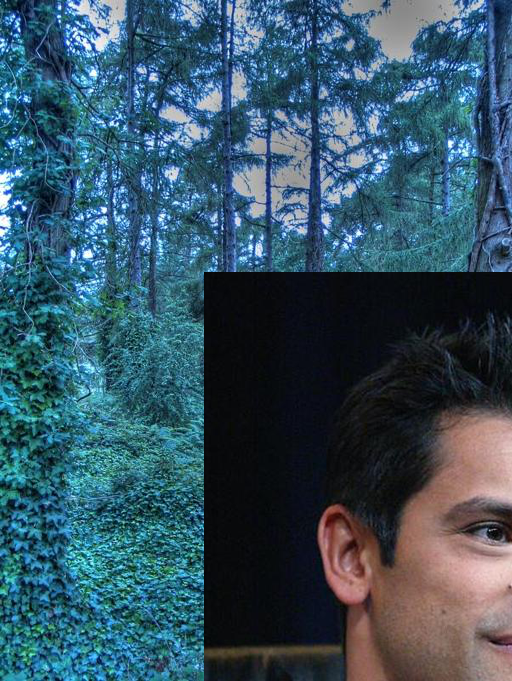

In [29]:
aisegment_img_example = Image.open(aisegment_img_df.loc[14, 'path'])
background = Image.open(places_dir / background_name)

AF.overlay_image(background, aisegment_img_example)

In [28]:
print(type(background))


<class 'torch.Tensor'>
